In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="ticks")
import matplotlib.pyplot as plt
import multiprocessing
from joblib import Parallel, delayed
%matplotlib inline
from scipy.optimize import curve_fit 
from scipy import stats
import datetime as dt
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from scipy.stats import skew
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
import pickle

In [3]:
# Read the exisiting cleaned data
#visuals_df = pd.read_pickle('/home/d.dasarathan/project_sml/df_newdata_cleaned_added_features.pkl')
visuals_df = pd.read_pickle('/scratch/d.dasarathan/df_newdata_cleaned_100k_added_features.pkl')

In [4]:
# Create a copy to draw visuals
visuals_df=visuals_df.reset_index(drop=True)
#visuals_df.head()

,Account,AdminComment,AllocCPUS,AllocGRES,AllocNodes,AllocTRES,AssocID,AveCPU,AveCPUFreq,AveDiskRead,AveDiskWrite,AvePages,AveRSS,AveVMSize,BlockID,Cluster,Comment,ConsumedEnergy,ConsumedEnergyRaw,CPUTime,CPUTimeRAW,DerivedExitCode,Elapsed,ElapsedRaw,Eligible,End,ExitCode,GID,Group,JobID,JobIDRaw,JobName,Layout,MaxDiskRead,MaxDiskReadNode,MaxDiskReadTask,MaxDiskWrite,MaxDiskWriteNode,MaxDiskWriteTask,MaxPages,MaxPagesNode,MaxPagesTask,MaxRSS,MaxRSSNode,MaxRSSTask,MaxVMSize,MaxVMSizeNode,MaxVMSizeTask,McsLabel,MinCPU,MinCPUNode,MinCPUTask,NCPUS,NNodes,NodeList,NTasks,Priority,Partition,QOS,QOSRAW,ReqCPUFreq,ReqCPUFreqMin,ReqCPUFreqMax,ReqCPUFreqGov,ReqCPUS,ReqGRES,ReqNodes,ReqTRES,Reservation,ReservationId,Reserved,ResvCPU,ResvCPURAW,Start,State,Submit,Suspended,SystemCPU,TotalCPU,UID,User,UserCPU,WCKey,WCKeyID,WorkDir,Unnamed: 87,waitTime,waitTimeHr,Req_totalMem,Timelimit_hr,QOD,QOY,exclusive,corehrs,rnjbct
0,netsi,NaN,1.0,NaN,1.0,"cpu=1,mem=5G,node=1,billing=1",3309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,discovery,NaN,0.0,0.0,02:57:01,10621.0,0:0,02:57:01,10621,2020-04-10 20:48:24,2020-04-10 23:45:41,0:0,100.0,users,10806989,10806989,simulation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,c3200,NaN,16367.0,netsi_standard,normal,1.0,Unknown,Unknown,Unknown,Unknown,1,NaN,10,"cpu=1,mem=5G,node=1",NaN,NaN,00:00:16,00:00:16,16.0,2020-04-10 20:48:40,COMPLETED,2020-04-10 20:48:24,00:00:00,00:09.804,01:30:59,5.089000e+04,xiong.xin,01:30:49,NaN,0.0,/scratch/xiong.xin/simulations/Nov202019_multi...,NaN,0 days 00:00:16,0.004444,5.0,4.0,q4,q2,0,4.0,30
1,maloney,NaN,1.0,7696487:1,1.0,"cpu=1,mem=2G,node=1,billing=101,gres/gpu=1",3265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,discovery,NaN,0.0,0,00:00:09,9.0,1:0,00:00:09,9,2020-06-06 03:49:45,2020-06-06 03:50:09,0:0,100.0,users,12043728,12043728,mag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,c2137,NaN,15814.0,gpu,normal,1.0,Unknown,Unknown,Unknown,Unknown,1,gpu:1,10,"cpu=1,mem=2G,node=1,gres/gpu=1",NaN,NaN,00:00:15,00:00:15,15.0,2020-06-06 03:50:00,COMPLETED,2020-06-06 03:49:45,00:00:00,00:00.575,00:01.419,1.825548e+09,wang.xu2,00:00.843,NaN,0.0,/home/wang.xu2/dis_larg_sys/mn_set1_b=1_1_inv_...,NaN,0 days 00:00:15,0.004167,20.0,8.0,q1,q2,0,8.0,13
2,steven.lopez,NaN,1.0,NaN,1.0,"cpu=1,mem=3G,node=1,billing=1",4525.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,discovery,NaN,0.0,0.0,00:09:03,543.0,0:0,00:09:03,543,2020-08-07 06:55:08,2020-08-07 07:11:39,0:0,100.0,users,13049922,13049922,2bt-236-125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,c0159,NaN,15738.0,short,normal,1.0,Unknown,Unknown,Unknown,Unknown,1,NaN,10,"cpu=1,mem=3G,node=1",NaN,NaN,00:07:28,00:07:28,448.0,2020-08-07 07:02:36,COMPLETED,2020-08-07 06:55:08,00:00:00,01:17.351,08:44.281,1.825607e+09,lijingbai2009,07:26.929,NaN,0.0,/scratch/lijingbai2009/NN-PES-QD/training-data...,NaN,0 days 00:07:28,0.124444,30.0,10.0,q2,q3,0,10.0,13
3,dapeng,NaN,28.0,NaN,1.0,"cpu=28,mem=200G,node=1,billing=28",5831.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,discovery,NaN,0.0,0.0,26-16:26:44,2305604.0,0:0,22:52:23,82343,2020-08-16 01:45:13,2020-08-17 00:50:22,0:0,100.0,users,13300264,13300264,short_22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,1.0,c0543,NaN,15641.0,short,normal,1.0,Unknown,Unknown,Unknown,Unknown,28,NaN,10,"cpu=28,mem=200G,node=1",NaN,NaN,00:12:46,05:57:28,21448.0,2020-08-16 01:57:59,COMPLETED,2020-08-16 01:45:13,00:00:00,1-07:22:14,25-21:54:35,1.825455e+09,huang.junx,24-14:32:21,NaN,0.0,/scratch/jxh,NaN,0 days 00:12:46,0.212778,2000.0,24.0,q1,q3,0,672.0,21
4,netsi,NaN,1.0,NaN,1.0,"cpu=1,mem=5G,node=1,billing=1",3309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,discovery,NaN,0.0,0.0,01:41:53,6113.0,0:0,01:41:53,6113,2020-04-08 17:53:03,2020-04-08 19:36:21,0:0,100.0,users,10717024,10717024,simulation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,c3202,NaN,16398.0,netsi_standard,norm

In [6]:
below1hr=visuals_df[(visuals_df['waitTimeHr'] <= 1)]
bw1_2=visuals_df[(visuals_df['waitTimeHr'] > 1) & (visuals_df['waitTimeHr'] <= 2)]
bw2_3=visuals_df[(visuals_df['waitTimeHr'] > 2) & (visuals_df['waitTimeHr'] <= 3)]
bw3_4=visuals_df[(visuals_df['waitTimeHr'] > 3) & (visuals_df['waitTimeHr'] <= 4)]
bw4_5=visuals_df[(visuals_df['waitTimeHr'] > 4) & (visuals_df['waitTimeHr'] <= 5)]
bw5_6=visuals_df[(visuals_df['waitTimeHr'] > 5) & (visuals_df['waitTimeHr'] <= 6)]
bw6_7=visuals_df[(visuals_df['waitTimeHr'] > 6) & (visuals_df['waitTimeHr'] <= 7)]
bw7_8=visuals_df[(visuals_df['waitTimeHr'] > 7) & (visuals_df['waitTimeHr'] <= 8)]
bw8_9=visuals_df[(visuals_df['waitTimeHr'] > 8) & (visuals_df['waitTimeHr'] <= 9)]
bw9_10=visuals_df[(visuals_df['waitTimeHr'] > 9) & (visuals_df['waitTimeHr'] <= 10)]
bw10_11=visuals_df[(visuals_df['waitTimeHr'] > 10) & (visuals_df['waitTimeHr'] <= 11)]
bw11_12=visuals_df[(visuals_df['waitTimeHr'] > 11) & (visuals_df['waitTimeHr'] <= 12)]
above12=visuals_df[(visuals_df['waitTimeHr'] >= 12)]

In [7]:
data = {'Wait Time':['Less than 1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', 'More than 12'],
       'Number of Jobs':[len(below1hr), len(bw1_2), len(bw2_3), len(bw3_4), len(bw4_5), len(bw5_6), len(bw6_7), len(bw7_8), len(bw8_9), len(bw9_10), len(bw10_11), len(bw11_12), len(above12)]}
# Create DataFrame of hourly binned data in terms of wait time. 
waittimebins = pd.DataFrame(data)
print(waittimebins)

       Wait Time  Number of Jobs
0    Less than 1           78791
1            1-2            5460
2            2-3            2824
3            3-4            2371
4            4-5            1528
5            5-6             760
6            6-7             599
7            7-8             516
8            8-9             459
9           9-10             355
10         10-11             311
11         11-12             304
12  More than 12            5722


Text(0.5, 1.0, 'Number of Jobs Vs Wait Time')

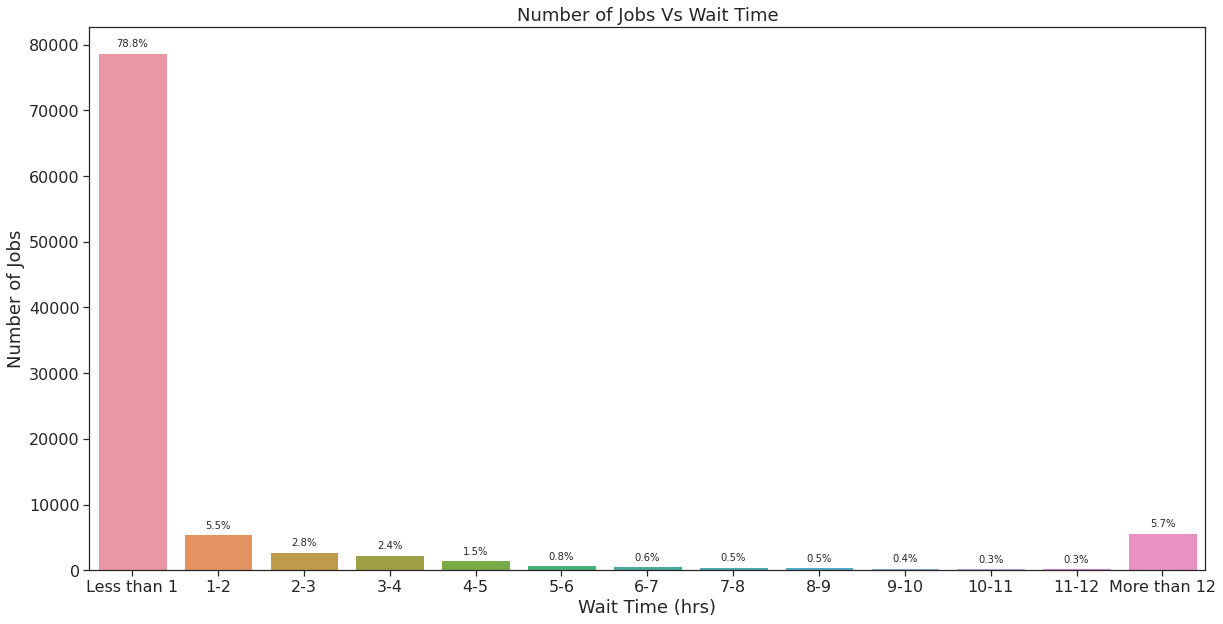

In [8]:
plt.figure(figsize=(20, 10))
splot=sns.barplot(x="Wait Time",y="Number of Jobs",data=waittimebins)
total=sum(waittimebins['Number of Jobs'])

for p in splot.patches:
    splot.annotate(format(100*p.get_height()/total, '.1f')+"%", 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Wait Time (hrs)", size=18)
plt.ylabel("Number of Jobs", size=18)
plt.title('Number of Jobs Vs Wait Time', size=18)

In [9]:
def accountJobStatsbw4_12(accountlist, df):
    df_stats=pd.DataFrame({'Account': [],'Jobs Wait b/w 4-12Hr': [],'Total Jobs': []})
    for account in accountlist:
        account_totaljobs = df[(df['Account'] == f'{account}')]
        account_bw4_12 = df[(df['Account'] == f'{account}') & (df['waitTimeHr'] <= 12)]
        account_bw4_12 = df[(df['Account'] == f'{account}') & (df['waitTimeHr'] > 4)]
        stats=[{'Account': account, 'Jobs Wait b/w 4-12Hr': len(account_bw4_12), 'Total Jobs': len(account_totaljobs)}]
        df_stats=df_stats.append(stats,ignore_index=True,sort=False)
    return df_stats

In [10]:
accountlist=['neu', 'lotterhos', 'steven.lopez', 'camato', 'r.west','whitford', 'netsi', 'rplatt', 'afeiguin']
outlieraccounts = accountJobStatsbw4_12(accountlist, visuals_df)
outlieraccounts=outlieraccounts.sort_values('Jobs Wait b/w 4-12Hr', ascending=False).reset_index(drop=True)
outlieraccounts

,Account,Jobs Wait b/w 4-12Hr,Total Jobs
0,neu,2291.0,15521.0
1,steven.lopez,1911.0,13551.0
2,camato,1360.0,2710.0
3,lotterhos,974.0,10881.0
4,whitford,737.0,18297.0
5,r.west,694.0,5343.0
6,rplatt,575.0,1070.0
7,afeiguin,406.0,1450.0
8,netsi,303.0,10600.0


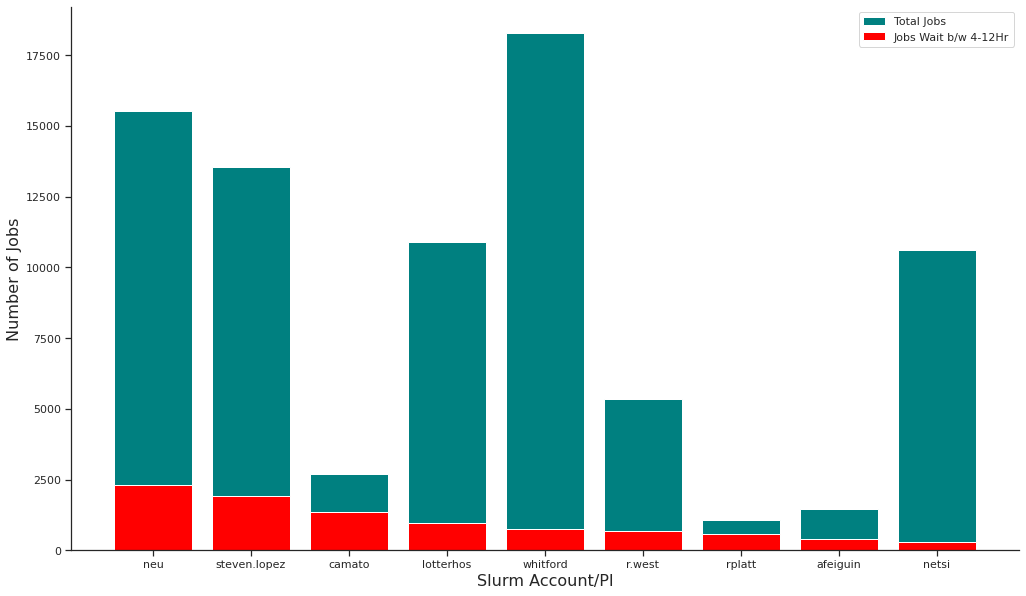

In [13]:
fig, ax = plt.subplots(figsize=(17,10))

ax.bar(outlieraccounts.Account, outlieraccounts['Total Jobs'], label='Total Jobs', color='teal')
ax.bar(outlieraccounts.Account, outlieraccounts['Jobs Wait b/w 4-12Hr'], label='Jobs Wait b/w 4-12Hr', color='red')

ax.set_xlabel('Slurm Account/PI', size=16)
ax.set_ylabel('Number of Jobs', size=16)
ax.legend()
ax.grid(False)
ax.set_facecolor('white')
#removing top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('/home/d.dasarathan/project_sml/slurmacctVSnoofjobs.png')
plt.show()